<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff; border:groove 5px blue;">CardioRisk Classifier Project</h1>
<div style="text-align: center; margin-top: 20px;">
  <img src="model_logo.png" alt="Model Logo" style="width: 300px; height: auto;">
</div>
<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Introduction</h2>

<div style="font-family:Arial, sans-serif; color:#333;">
<p>
Cardiovascular disease remains one of the leading causes of death globally. Early prediction and classification of heart disease risk levels are essential to improving healthcare outcomes through timely intervention. This project, titled <strong>CardioRisk Classifier</strong>, presents a machine learning-based system developed to predict the presence of heart disease using clinical parameters.The goal of this system is to intelligently classify whether a patient is likely to have heart disease based on these inputs, using various supervised learning models.
</p>
<p>
  The dataset used in this project is sourced from a reliable public repository 
  (<a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease" target="_blank">
    UCI Machine Learning Repository
  </a>), specifically the 
  <strong>processed.cleveland.data</strong> file. It contains multiple features relevant to cardiovascular health, 
  such as age, cholesterol levels, chest pain type, resting blood pressure, and more. 
  The attributes used are summarized in the table below:
</p>
</div>
<hr>
<table style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif; color:#333; margin-top:20px;">
  <thead>
    <tr>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Symbol and Column No.</th>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Attribute Name</th>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding:10px; border:1px solid #ccc;">1. (age)</td><td style="padding:10px; border:1px solid #ccc;">Age</td><td style="padding:10px; border:1px solid #ccc;">Ages in years</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">2. (sex)</td><td style="padding:10px; border:1px solid #ccc;">Sex</td><td style="padding:10px; border:1px solid #ccc;">1 = male; 0 = female</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">3. (cp)</td><td style="padding:10px; border:1px solid #ccc;">Chest pain type</td><td style="padding:10px; border:1px solid #ccc;">Value 1: typical angina<br>Value 2: atypical angina<br>Value 3: non-anginal pain<br>Value 4: asymptomatic</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">4. (trestbps)</td><td style="padding:10px; border:1px solid #ccc;">Resting blood pressure</td><td style="padding:10px; border:1px solid #ccc;">in mm Hg on admission to the hospital</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">5. (chol)</td><td style="padding:10px; border:1px solid #ccc;">Serum Cholesterol</td><td style="padding:10px; border:1px solid #ccc;">In mg/dl</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">6. (fbs)</td><td style="padding:10px; border:1px solid #ccc;">Fasting Blood Sugar > 120 Mg/Dl</td><td style="padding:10px; border:1px solid #ccc;">(1 = true; 0 = false)</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">7. (restecg)</td><td style="padding:10px; border:1px solid #ccc;">Resting Electrocardiographic Results</td><td style="padding:10px; border:1px solid #ccc;">Value 0: normal<br>Value 1: ST-T wave abnormality<br>Value 2: left ventricular hypertrophy by Estes' criteria</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">8. (thalach)</td><td style="padding:10px; border:1px solid #ccc;">Maximum Heart Rate Achieved</td><td style="padding:10px; border:1px solid #ccc;">Measured values</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">9. (exang)</td><td style="padding:10px; border:1px solid #ccc;">Exercise Induced Angina</td><td style="padding:10px; border:1px solid #ccc;">1 = yes; 0 = no</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">10. (oldpeak)</td><td style="padding:10px; border:1px solid #ccc;">ST depression induced by exercise relative to rest</td><td style="padding:10px; border:1px solid #ccc;">Measured values</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">11. (slope)</td><td style="padding:10px; border:1px solid #ccc;">Slope of the peak exercise ST segment</td><td style="padding:10px; border:1px solid #ccc;">Value 1: upsloping<br>Value 2: flat<br>Value 3: downsloping</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">12. (ca)</td><td style="padding:10px; border:1px solid #ccc;">Number of major vessels colored by fluoroscopy</td><td style="padding:10px; border:1px solid #ccc;">Count values (0–3)</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">13. (thal)</td><td style="padding:10px; border:1px solid #ccc;">Thalassemia</td><td style="padding:10px; border:1px solid #ccc;">3 = normal<br>6 = fixed defect<br>7 = reversible defect</td></tr>
    <tr><td style="padding:10px; border:1px solid #ccc;">14. (num)</td><td style="padding:10px; border:1px solid #ccc;">Target</td><td style="padding:10px; border:1px solid #ccc;">0 = No disease<br>1–4 = Disease</td></tr>
  </tbody>
</table>


<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Importing all libraries</h1>

In [142]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import statsmodels.formula.api as smf
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Loading heart data from UCI repository</h1>

In [143]:
raw_data = pd.read_csv('C://Users//kktc//Desktop//SPECIAL FILES//Projects//Heart disease Prediction Project//dataset//heart+disease//processed.cleveland.data',header = None)
raw_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Sorting data by age</p>

In [144]:
raw_data = raw_data.sort_values('age')
raw_data = raw_data.reset_index(drop=True)

<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Doing same data analysis</h1>

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Displaying data size</p>

In [145]:
raw_data.shape

(303, 14)

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Displaying 1st 5 rows of the dataset</p>

In [146]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
1,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0
2,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
3,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
4,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Displaying last 5 rows</p>

In [147]:
raw_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,0
299,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0
300,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
301,76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,0.0,1.1,2.0,0.0,3.0,0
302,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Statistical summary</p>

In [148]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Checking the data types</p>

In [149]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Checking the rows that contains NaNs values represented by '?'</p>

In [150]:
raw_data[raw_data.thal == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
119,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0


In [151]:
raw_data[raw_data.ca == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
9,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0
41,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
109,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
181,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Six rows found with the NaNs values which is not good <br> I want to drop those rows</p>

In [152]:
#create index lists for the row which contain NaNs
ca_Nan_index = raw_data.index[raw_data.ca=='?'].tolist()
thal_Nan_index = raw_data.index[raw_data.thal == '?'].tolist()

#concatenate list
drop_Nan_index = thal_Nan_index + ca_Nan_index


#dropping NaNs rows
raw_data = raw_data.drop(raw_data.index[drop_Nan_index])

#checking the dataset size
raw_data.shape

(297, 14)

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Checking for missing values</p>

In [153]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Checking for duplicate values</p>

In [154]:
duplicate_value  = raw_data.duplicated().any()
if duplicate_value:
    print('There are same duplicate values')
else:
    print('No duplicate value')

No duplicate value


<div style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">
<p>For Target attribute we have 0 to represent a person without a disease and values(1,2,3,4) to represent positive results now we want to make sure that we have two values 0 and 1 so I will replace values 1,2,3,4 with value 1 to represent positive results.<br>So that:</p>
<ul>
    <li>Value 0 = Disease free</li>
    <li>Value 1 = Disease</li>
</ul>
</div>



In [155]:
raw_data.loc[raw_data['target']>0,'target']=1
raw_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
1,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0
2,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
3,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
4,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
5,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1
6,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
7,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
8,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
10,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1


<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Convert all attributes to float</p>

In [156]:
raw_data = raw_data.astype({"age":'float', "sex":'float',"cp":'float',"trestbps":'float',"thalach":'float', "chol":'float',"fbs":'float',"restecg":'float',
                "exang":'float',"oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'})
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Exploring Relationships Between attributes</h1>

In [157]:
raw_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


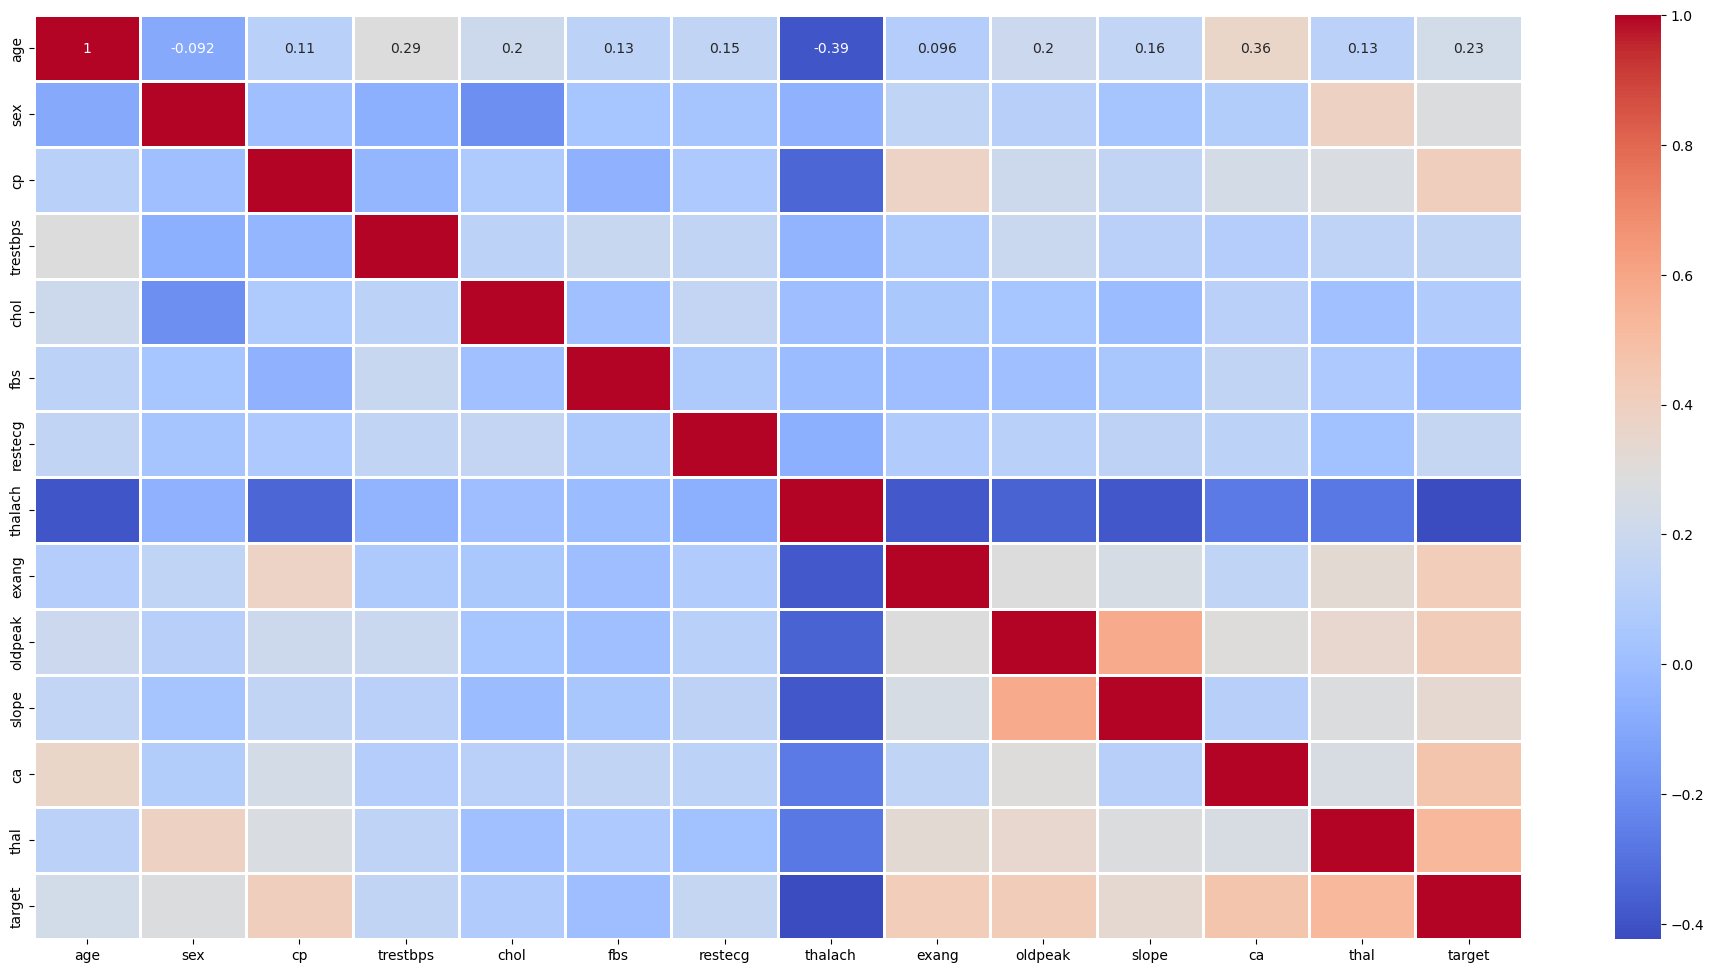

In [158]:
plt.figure(figsize=(24,12))
sns.heatmap(raw_data.corr(),cmap='coolwarm',annot=True,linewidths=1)
plt.show()


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Number Affected and Unaffected by heart Problems</h2>

In [159]:
raw_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

People with Heart disease(1):  137
People without heart disease(0): 160


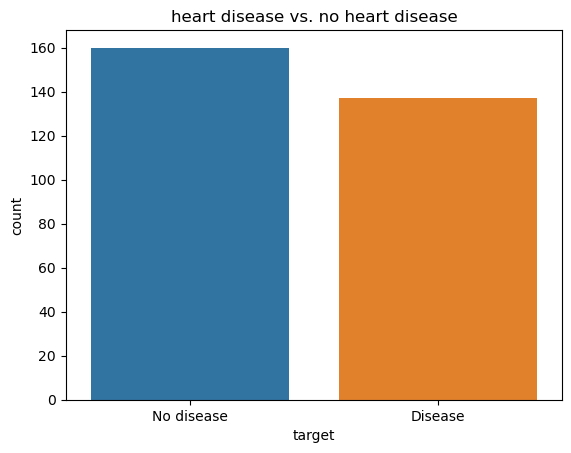

In [160]:
no_disease = sum(raw_data.target == 0 )
disease = sum(raw_data.target == 1)
print('People with Heart disease(1): ',disease)
print('People without heart disease(0):',no_disease)
sns.countplot(x=raw_data.target).set_title('heart disease vs. no heart disease')
plt.xticks([0,1],['No disease','Disease'])
plt.show()


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Distribution of Gender in the dataset</h2>

Female(0):  96
Male(1): 201


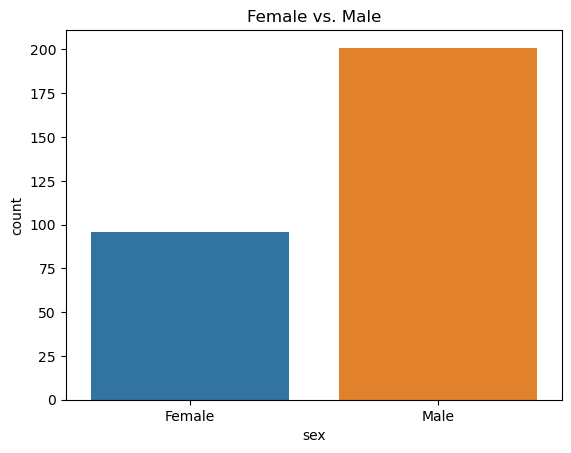

In [161]:
female = sum(raw_data.sex == 0 )
male = sum(raw_data.sex == 1)
print('Female(0): ',female)
print('Male(1):',male)
sns.countplot(x=raw_data.sex).set_title('Female vs. Male')
plt.xticks([0.0,1.0],['Female','Male'])
plt.show()

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Distribution of disease among gender.</h2>

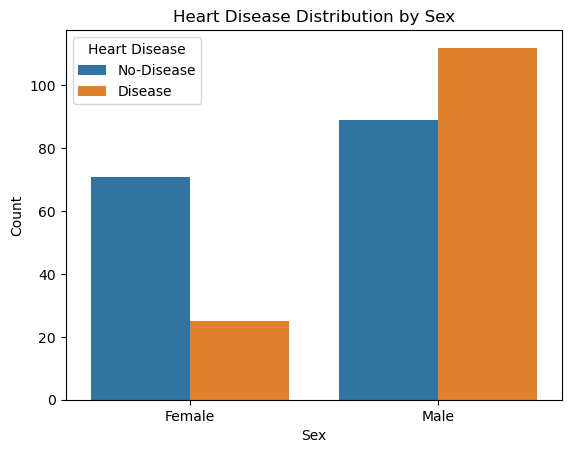

In [162]:
raw_data['target'] = raw_data['target'].astype(str)

sns.countplot(data=raw_data, x='sex', hue='target')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No-Disease', 'Disease']) # Added a title to the legend for clarity
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Sex')
plt.show()

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Distribution of Ages in our Dataset.</h2>

In [163]:
raw_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

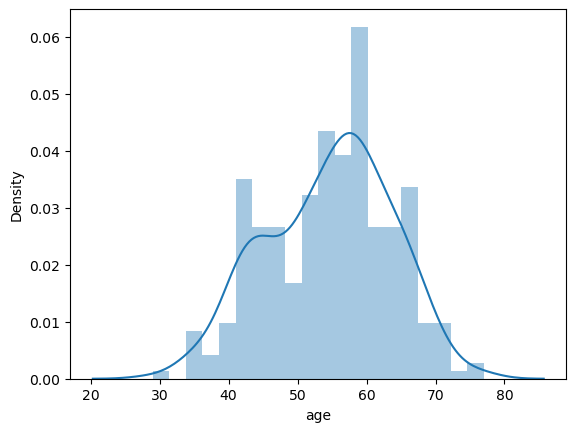

In [164]:
sns.distplot(raw_data['age'], bins=20)
plt.show()

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Chest Pain Types</h2>

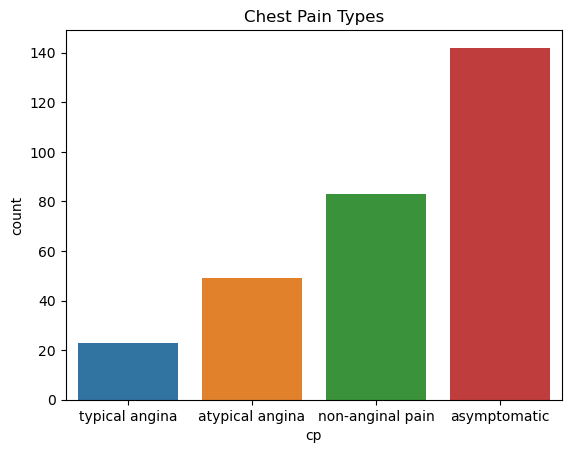

In [165]:

sns.countplot(x=raw_data['cp']).set_title('Chest Pain Types')
plt.xticks([0,1,2,3], ["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Heart Disease Distribution by Chest pain</h2>

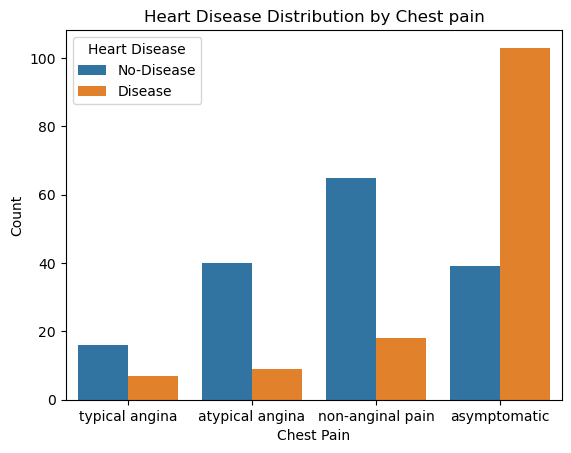

In [166]:
sns.countplot(data=raw_data, x='cp', hue='target')
plt.xticks([0,1,2,3], ["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.legend(title='Heart Disease', labels=['No-Disease', 'Disease']) 
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Chest pain')
plt.show()

<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Data Modeling</h1>

<div style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">
<h2>Creating New training data</h2>
<p>
I am going to use 10 attributes which are more correlated to the target attribute I am going to use ('age', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal')
</p>
</div>

In [167]:
data = raw_data.drop(['fbs', 'restecg','sex'], axis=1)
data.head(10)

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,2.0,130.0,204.0,202.0,0.0,0.0,1.0,0.0,3.0,0
1,34.0,1.0,118.0,182.0,174.0,0.0,0.0,1.0,0.0,3.0,0
2,34.0,2.0,118.0,210.0,192.0,0.0,0.7,1.0,0.0,3.0,0
3,35.0,2.0,122.0,192.0,174.0,0.0,0.0,1.0,0.0,3.0,0
4,35.0,4.0,138.0,183.0,182.0,0.0,1.4,1.0,0.0,3.0,0
5,35.0,4.0,120.0,198.0,130.0,1.0,1.6,2.0,0.0,7.0,1
6,35.0,4.0,126.0,282.0,156.0,1.0,0.0,1.0,0.0,7.0,1
7,37.0,3.0,130.0,250.0,187.0,0.0,3.5,3.0,0.0,3.0,0
8,37.0,3.0,120.0,215.0,170.0,0.0,0.0,1.0,0.0,3.0,0
10,38.0,1.0,120.0,231.0,182.0,1.0,3.8,2.0,0.0,7.0,1


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Creating y values </h2>

In [168]:
data['target'] = data['target'].astype(int)
y = data['target']

<div style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">
<h2>Creating X values</h2>

In [169]:
X = data.drop(['target'], axis=1)

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Checking Multicollinearity problem</h2>

In [170]:
VIF_data = pd.DataFrame()
VIF_data['factors'] = data.columns
VIF_data['VarianceInfluenceFactor'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [171]:
VIF_data.sort_values(by = 'VarianceInfluenceFactor', ascending = False)

,factors,VarianceInfluenceFactor
2,trestbps,59.547675
0,age,42.666552
4,thalach,34.009194
3,chol,25.004634
1,cp,13.817691
7,slope,11.671349
9,thal,9.994038
10,target,3.789372
6,oldpeak,3.176128
8,ca,2.215682


<div style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">
<h2>Preprocessing data</h2>
<p>The reason we perform this preprocessing is to ensure all the values are within a scale that can be used to make comparisons between factors which may have wildly differing units or scales which would be erroneous to compare. For example, it makes no sense to compare cholesterol values showing serum cholesterol in mg/dl with voltage readings taken for electrocardiograms. This will also fix the multicollinearity problem which I will show below.</p>
</div>

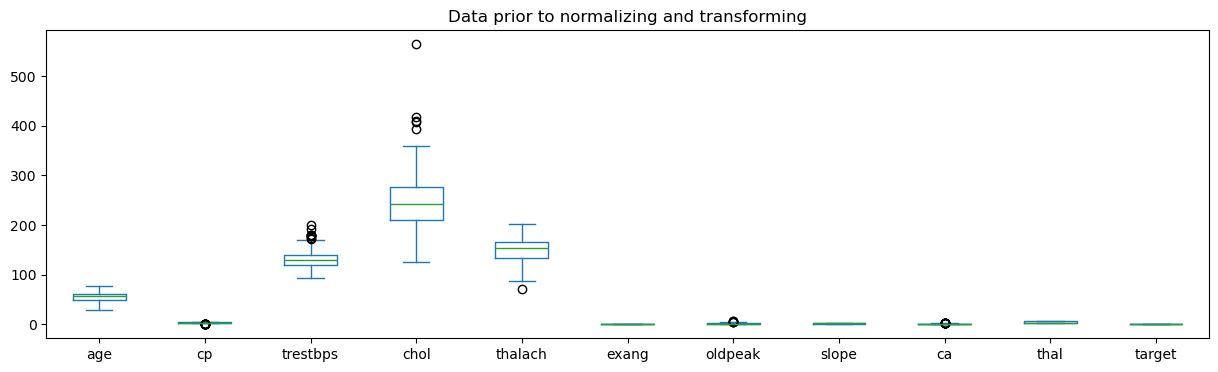

In [172]:
data.plot.box(figsize=(15,4));
plt.title('Data prior to normalizing and transforming');

In [173]:
X = np.asarray(data[['age', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])
y = np.asarray(data['target'])
  
# Use Train and Test plit to split the data into two sets.
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2,random_state=0)
print ('Train set:',X_train.shape,y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 10) (237,)
Test set: (60, 10) (60,)


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Preprocessing the train and test set.</h2>

In [174]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Now show the preprocessed training data we will be using moving forward.</h2>

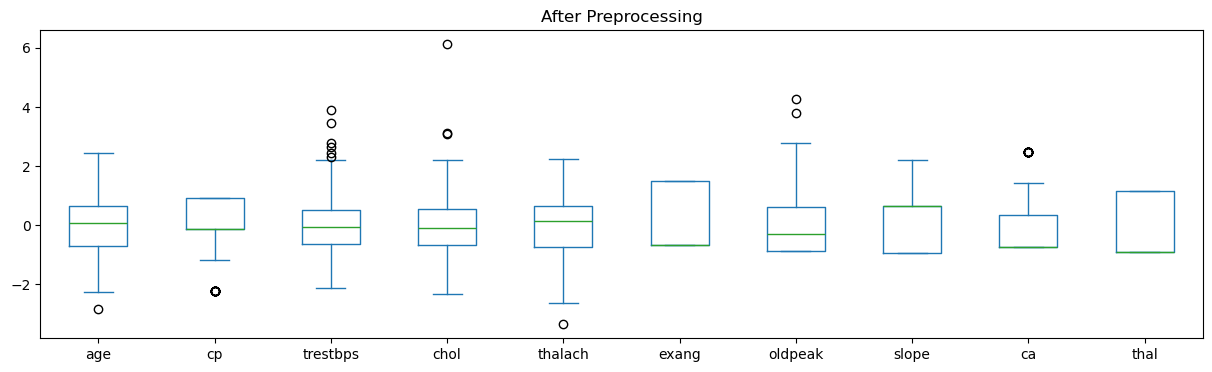

In [175]:
labels = ['age', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

datap = pd.DataFrame(X_train,columns = labels)
datap.plot.box(figsize=(15,4));
plt.title('After Preprocessing');

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Now let's look at the variance inflation factor (VIF) to see if we still have multicollinearity, which should be fixed. The VIF for each factor should be closer to one indicating low multicollinearity in the data.</p>

In [176]:
VIF_data = pd.DataFrame()
VIF_data['factors'] = datap.columns
#compute the VIF 
VIF_data['VarianceInfluenceFactor'] = [variance_inflation_factor(datap.values,i) for i in range(len(datap.columns))]
VIF_data.sort_values(by = 'VarianceInfluenceFactor', ascending = False)

,factors,VarianceInfluenceFactor
6,oldpeak,1.956690
7,slope,1.749145
4,thalach,1.713849
0,age,1.502071
5,exang,1.420984
8,ca,1.354750
9,thal,1.349970
1,cp,1.309518
2,trestbps,1.140719
3,chol,1.064825


<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model 1: Logistic Regression</h2>

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Training the model</p>

In [177]:
lr = LogisticRegression()

#fit the model 
lr = lr.fit(X_train, y_train)



<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Predict how well model fits the known data.</p>

In [178]:
y_pred = lr.predict(X_test)

<p style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Showing model accuracy</p>

In [179]:

lr_train_score = round(lr.score(X_train, y_train),3)
lr_test_score = round(lr.score(X_test, y_test),3)

print('Training Score: ',lr_train_score)
print('Testing Score: ', lr_test_score)


Training Score:  0.857
Testing Score:  0.817


<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model Confusion matrix</h3>

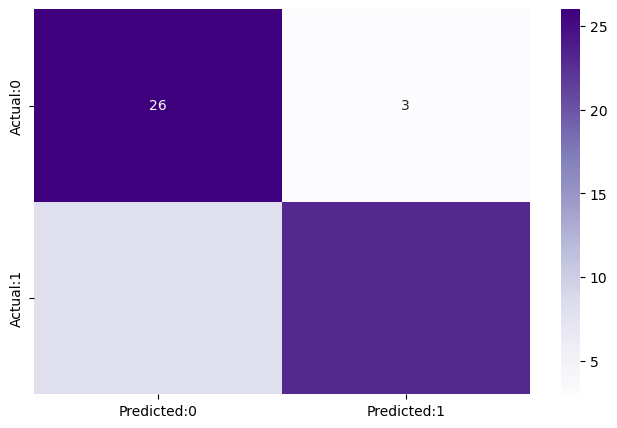

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.88      0.74      0.81        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [180]:

lr_cm = confusion_matrix(y_test,y_pred)
conf_matrix_lg = pd.DataFrame(data = lr_cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
#use seaborn to make the confusion matrix have heatmap coloring
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

conf_matrix_lg_cr = classification_report(y_test, y_pred)
print('Classification Report: ')
print(conf_matrix_lg_cr)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Overall Model Accuracy</h3>

In [181]:
accuracy  = (lr_cm[0,0] + lr_cm[1,1])/ np.sum(lr_cm)
print('Model accuracy',accuracy,'\n')


Model accuracy 0.8166666666666667 



<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model 2: K-nearest Neighbors Classifier</h2>

In [182]:
recalls = []
ks = list(range(1,30))
for k in ks:
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
    neigh.fit(X_train, y_train)
    knn_hat = neigh.predict(X_test)
    knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
    recalls.append( sklearn.metrics.recall_score(y_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

Smallest k with highest score, 5 and score for k    0.85
Name: 5, dtype: float64


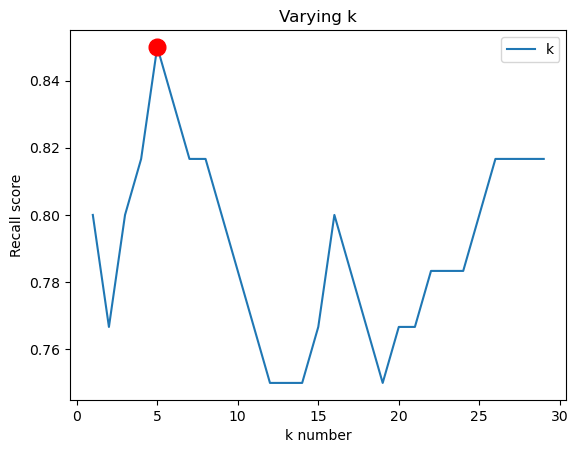

In [183]:
kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

#plot the k we found using recall on plot. 
kdat.plot();
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [184]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [185]:
knn_hat = neigh.predict(X_test)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">The knn models report for how well it worked</h3>

KNN( 5 ) confusion matrix is = 
 
 [[25  4]
 [ 5 26]] 

Success =  0.8387096774193549 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.85        31

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



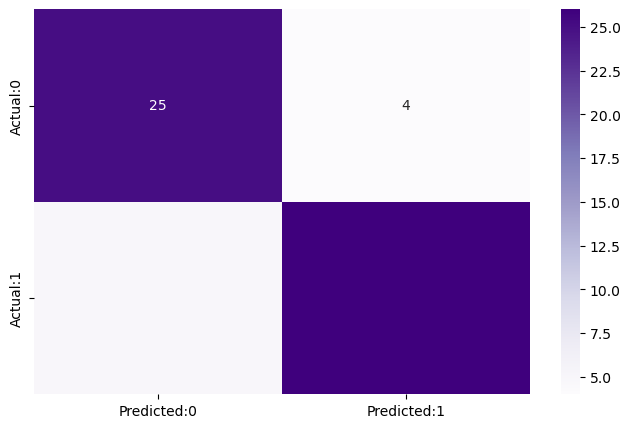

Training Score:  0.861
Testing Score:  0.85
Model accuracy: 0.85 



In [186]:
knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
print('KNN(', k,') confusion matrix is = \n', '\n',knn_cm,'\n')
print('Success = ', knn_cm[1,1] / (knn_cm[1,0] + knn_cm[1,1]),'\n')
knn_cr = sklearn.metrics.classification_report(y_test, knn_hat)
print(knn_cr)

conf_matrix_lg = pd.DataFrame(data = knn_cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
#use seaborn to make the confusion matrix have heatmap coloring
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

#scores
knn_score_train = round(neigh.score(X_train, y_train),3)
knn_score_test = round(neigh.score(X_test, y_test),3)
print('Training Score: ',knn_score_train)
print('Testing Score: ',knn_score_test)
k_accuracy  = (knn_cm[0,0] + knn_cm[1,1])/ np.sum(knn_cm)
print('Model accuracy:',k_accuracy,'\n')

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model 3: Random Forest Classifier  </h2>

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Training algorithm<h3>

In [187]:
rf = RandomForestClassifier(
    n_estimators = 2, random_state=10,max_depth=3, n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=2, n_jobs=-1, random_state=10)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Predict how well model fits the known data.</h3>


In [188]:
y_pred = rf.predict(X_test)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">The model report for how well it worked</h3>

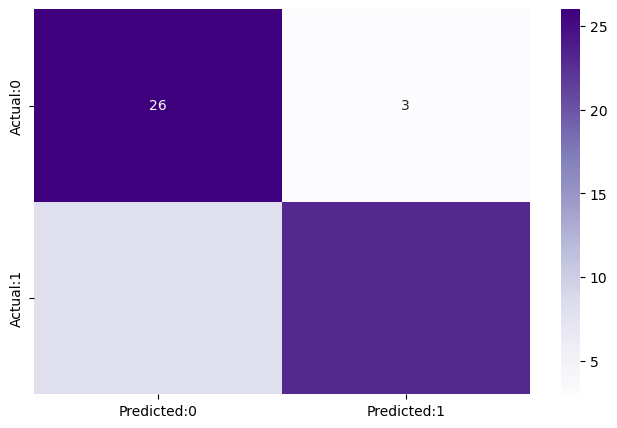

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.88      0.74      0.81        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60

Random Forest Test Score:  0.817
Random Forest Train Score:  0.835
Testing Accuracy of Random forest:  0.8166666666666667


In [189]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix_rf = pd.DataFrame(data=cm, 
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Purples")
plt.show()

# Classification report
cr_rf = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr_rf)

# Scores
rf_test_score = round(rf.score(X_test, y_test), 3)
rf_train_score = round(rf.score(X_train, y_train), 3)

print("Random Forest Test Score: ", rf_test_score)
print("Random Forest Train Score: ", rf_train_score)

# Accuracy
rf_accuracy = rf.score(X_test, y_test)
print("Testing Accuracy of Random forest: ", rf_accuracy)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;" >Here I pull out the features the model considers most relevant.</h3>

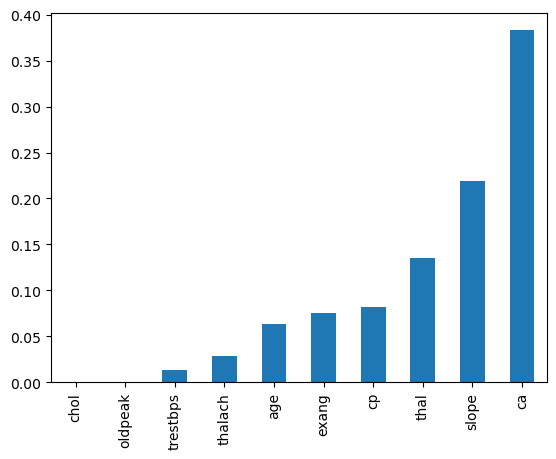

In [190]:
importances = rf.feature_importances_
importances = pd.DataFrame(importances,['age', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
importances=importances.rename(columns={0: "Features_Importance"})
importances  = importances.Features_Importance.sort_values()
importances.plot.bar();

<h2 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model 4: Support Vector Classifier  </h2>

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Training model</h3>

In [191]:
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model Predictions</h3>

In [192]:
svm_prediction = svm_model.predict(X_test)


<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Model accuracy</h3>

In [193]:
svm_accuracy = accuracy_score(y_test,svm_prediction)
print("Testing Accuracy of SVC model: ",svm_accuracy)

Testing Accuracy of SVC model:  0.8333333333333334


<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Confusion matrix</h3>

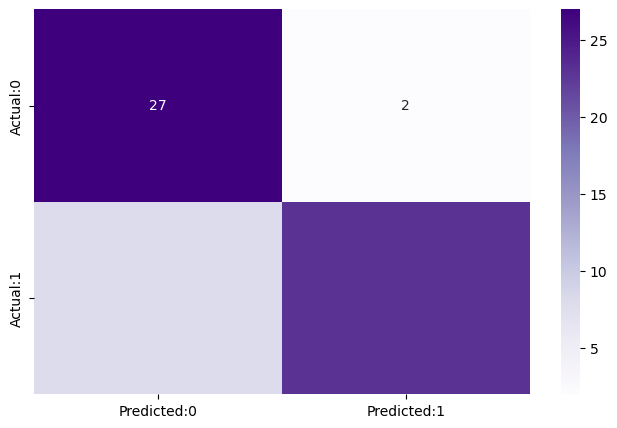

Classification Report: =
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.74      0.82        31

    accuracy                           0.83        60
   macro avg       0.85      0.84      0.83        60
weighted avg       0.85      0.83      0.83        60

Random Forest Test Score:  0.833
Random Forest Train Score:  0.878


In [194]:
# Confusion matrix 
cm_svm = confusion_matrix(y_test,svm_prediction)
conf_matrix_svm = pd.DataFrame(data = cm_svm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

cr_svm= classification_report(y_test, svm_prediction)
print('Classification Report: =')
print(cr_svm)

#scores
svm_test_score = round(svm_model.score(X_test,y_test),3)
svm_train_score = round(svm_model.score(X_train,y_train),3)


print("Random Forest Test Score: ",svm_test_score)
print("Random Forest Train Score: ",svm_train_score)

<div style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">
<h1>Summarizing All Model Performance.</h1>
<p>Summarize results by showing the four confusion matrices for the models which used all the attributes. Place them in subplots and place the classification reports for each model below.</p>
</div>

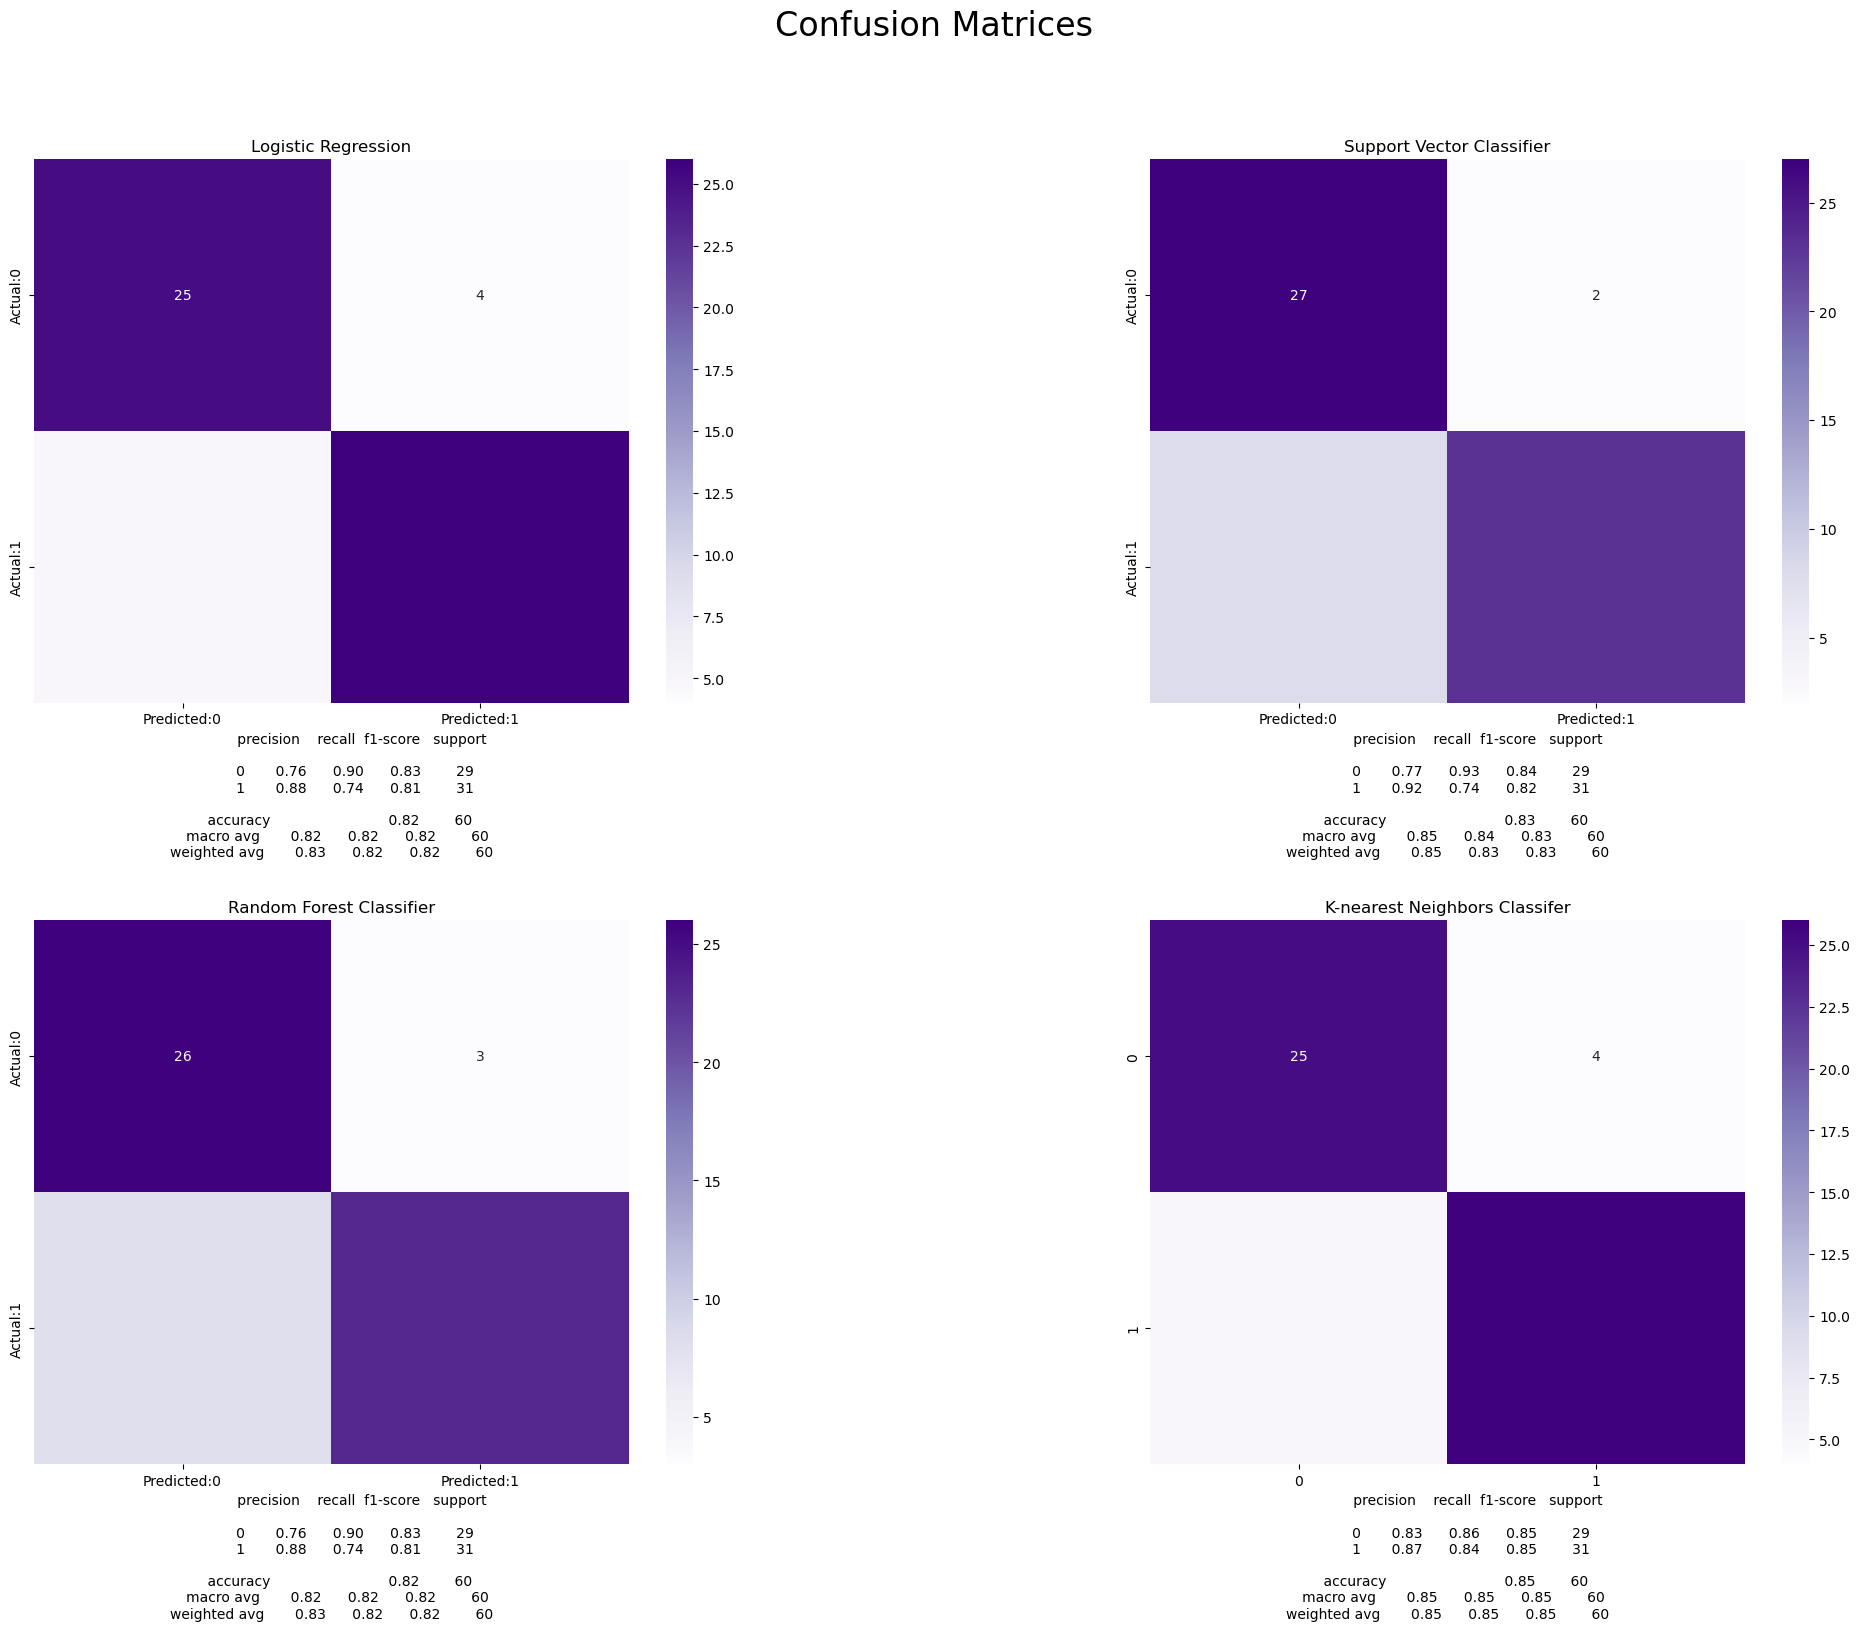

In [195]:
plt.figure(figsize=(24,15));
plt.suptitle("Confusion Matrices",fontsize=24);
plt.subplots_adjust(wspace = 0.5, hspace= 0.4,bottom=0.01)

plt.subplot(2,2,1);
plt.title("Logistic Regression");
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(conf_matrix_lg_cr);

plt.subplot(2,2,2);
plt.title("Support Vector Classifier");
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(cr_svm);

plt.subplot(2,2,3);
plt.title("Random Forest Classifier");
sns.heatmap(conf_matrix_rf, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(cr_rf);

plt.subplot(2,2,4);
plt.title("K-nearest Neighbors Classifer");
sns.heatmap(knn_cm, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(knn_cr);

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Create a dataframe and place all the training and test scores together for easy viewing.</h3>

In [196]:
#place all testing and traing scores into array
array = [[lr_train_score, lr_test_score],[svm_train_score,svm_test_score],[knn_score_train, knn_score_test],[rf_train_score,rf_test_score ]]

#create some labels for DataFrame
label_index = ['Logistic Regression','Support Vector Classifier','K-Nearest Neighbors','Random Forest Classifier']

#create Dataframe
results = pd.DataFrame(array, columns = ['Training Scores','Testing Scores'])

#place labels for index 
results = results.set_index([pd.Index(label_index)])

#add model name for the index column, which is just the name
results.index.name = 'Model'

#print results
results

,Training Scores,Testing Scores
Model,,
Logistic Regression,0.857,0.817
Support Vector Classifier,0.878,0.833
K-Nearest Neighbors,0.861,0.850
Random Forest Classifier,0.835,0.817


<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">BUILDING A PREDICTIVE SYSTEM using K-Nearest Neighbors which is the best</h1>

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Taking input data to predict</h3>

In [261]:
data_names = ['Age: ', 'cp: ', 'trestbps: ', 'chol: ', 'thalach: ',
       'exang: ', 'oldpeak: ', 'slope: ', 'ca: ', 'thal: ']
input_data = []
for name in data_names:
    data = float(input(name))
    input_data.append(data)

input_data

Age:  77
cp:  4
trestbps:  125
chol:  304
thalach:  162
exang:  1
oldpeak:  0
slope:  1
ca:  3
thal:  3


[77.0, 4.0, 125.0, 304.0, 162.0, 1.0, 0.0, 1.0, 3.0, 3.0]

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Convert to numpy array and reshape for prediction</h3>

In [262]:
arr = np.array(input_data).reshape(1, -1)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Scale input data using the same scaler used during training</h3>

In [263]:
arr_scaled = scaler.transform(arr)

<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Making predication</h3>

In [264]:
prediction = neigh.predict(arr_scaled)


<h3 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">Predication Result</h3>

In [265]:
if prediction == 0:
    print('You are Healthy No CardioRisk.')
else:
    print('Consult your Doctor.')
print(prediction)

Consult your Doctor.
[1]


<h1 style="color:#004080; font-family:Arial, sans-serif; background-color:#e6f0ff; padding:10px; font-weight:bold; border:groove 5px #004080;">FINAL REPORT</h1>

<h2 style="color:#004080; font-family:Arial, sans-serif;">Methodology</h2>
<ol style="font-family:Arial, sans-serif; color:#333;">
  <li><strong>Data Preprocessing:</strong> Missing values were handled and StandardScaler was used for feature scaling.</li>
  <li><strong>Model Training:</strong>
    <ul>
      <li>Logistic Regression</li>
      <li>Support Vector Machine (SVM)</li>
      <li>Random Forest Classifier</li>
      <li>K-Nearest Neighbors (KNN)</li>
    </ul>
  </li>
  <li><strong>Model Evaluation:</strong> Accuracy score, confusion matrix, classification report, and VIF analysis were used.</li>
</ol>

<h2 style="color:#004080; font-family:Arial, sans-serif;">Model Evaluation Report</h2>
<p style="font-family:Arial, sans-serif; color:#333;">
This section provides an overview of how the implemented machine learning algorithms performed during training and testing phases. Four different models were evaluated using accuracy scores to determine their effectiveness in predicting heart disease.
</p>

<table style="width:80%; border-collapse:collapse; font-family:Arial, sans-serif; color:#333; margin: 20px 0;">
  <thead>
    <tr>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Model</th>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Training Accuracy</th>
      <th style="padding:10px; border:1px solid #ccc; background-color:#e6f0ff;">Test Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:1px solid #ccc;">Logistic Regression</td>
      <td style="padding:10px; border:1px solid #ccc;">0.857</td>
      <td style="padding:10px; border:1px solid #ccc;">0.817</td>
    </tr>
    <tr>
      <td style="padding:10px; border:1px solid #ccc;">Support Vector Classifier</td>
      <td style="padding:10px; border:1px solid #ccc;">0.878</td>
      <td style="padding:10px; border:1px solid #ccc;">0.833</td>
    </tr>
    <tr>
      <td style="padding:10px; border:1px solid #ccc;">K-Nearest Neighbors</td>
      <td style="padding:10px; border:1px solid #ccc;">0.861</td>
      <td style="padding:10px; border:1px solid #ccc;">0.850</td>
    </tr>
    <tr>
      <td style="padding:10px; border:1px solid #ccc;">Random Forest Classifier</td>
      <td style="padding:10px; border:1px solid #ccc;">0.835</td>
      <td style="padding:10px; border:1px solid #ccc;">0.817</td>
    </tr>
  </tbody>
</table>

<p style="font-family:Arial, sans-serif; color:#333;">
Among all tested models, the <strong>K-Nearest Neighbors</strong> classifier achieved the highest test accuracy of <strong>0.850</strong>, demonstrating the best generalization performance. While <strong>Support Vector Classifier</strong> also showed strong performance with a test accuracy of <strong>0.833</strong>, KNN slightly outperformed it.
</p>

<p style="font-family:Arial, sans-serif; color:#333;">
The <strong>Logistic Regression</strong> and <strong>Random Forest</strong> models both achieved a test accuracy of <strong>0.817</strong>. Although these models performed fairly well, they were not as effective as KNN or SVC in this particular use case.
</p>

<p style="font-family:Arial, sans-serif; color:#333;">
Based on these results, the KNN model was chosen as the preferred algorithm for this system due to its overall balance and superior test accuracy.
</p>

<h2 style="color:#004080; font-family:Arial, sans-serif;">Conclusion</h2>
<p style="font-family:Arial, sans-serif; color:#333;">
The final evaluation confirms that the <strong>K-Nearest Neighbors</strong> algorithm is the most suitable model for the CardioRisk Classifier. Future work may include integrating this model into a functional interface, tuning hyperparameters for improved accuracy, and testing on larger or localized datasets for enhanced relevance.
</p>

<h1 style="color:#004080; font-family:Arial, sans-serif; padding: 10px;  background-color:#e6f0ff;">About Me</h1>
<div style="font-family: Arial, sans-serif; line-height: 1.6; font-size: 16px;">

  <p>
    My name is <strong>Godknows Nyandoro</strong>, a Computer Science student at the University of Zimbabwe. 
    Below are my contact details and professional profiles:
  </p>
  <ul>
    <li>WhatsApp: <a href="https://wa.me/263779319824" target="_blank">+263 779 319 824</a></li>
    <li>Email: <a href="mailto:nyandorog@gmail.com">nyandorog@gmail.com</a></li>
    <li>GitHub: <a href="https://github.com/Godknows-Jv" target="_blank">https://github.com/Godknows-Jv</a></li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/godknows-nyandoro-65a7a5320/" target="_blank">https://www.linkedin.com/in/godknows-nyandoro-65a7a5320/</a></li>
  </ul>
  <p>
    Feel free to reach out or connect with me!
  </p>
</div>
